<a href="https://colab.research.google.com/github/HemantRajSingh/MovieMatch/blob/master/ExploratoryData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# import string library for text preprocessing
import string

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [105]:
df=pd.read_csv('../data/processed/preprocessed_dataset.csv')
df.head()

,image_link,imdb_id,rating_count,rating,genre,keywords,trailer_link,actors,director,title,year,plot,processed_plot
0,https://m.media-amazon.com/images/M/MV5BMDliMm...,tt0172495,1610899,8.5,"[Action, Adventure, Drama]","[roman empire, gladiator, slavery, combat, bat...",https://www.imdb.com/video/vi2628367897/,"[Russell Crowe, Joaquin Phoenix, Connie Nielsen]",[Ridley Scott],Gladiator,2000,"Shouting ""Roma Invicta!"" as his forces attack,...",shouting rom invicta force attack general maxi...
1,https://m.media-amazon.com/images/M/MV5BZTcyNj...,tt0209144,1316937,8.4,"[Mystery, Thriller]","[memory, short term memory loss, hidden truth,...",https://www.imdb.com/video/vi3220356889/,"[Guy Pearce, Carrie-Anne Moss, Joe Pantoliano]",[Christopher Nolan],Memento,2000,"Leonard Shelby (Guy Pearce), a man whose short...",leonard shelby guy pearce man whose short term...
2,https://m.media-amazon.com/images/M/MV5BMTA2ND...,tt0208092,906115,8.2,"[Comedy, Crime]","[diamond, boxer, narrated by character, cockne...",https://www.imdb.com/video/vi1558577433/,"[Jason Statham, Brad Pitt, Stephen Graham]",[Guy Ritchie],Snatch,2000,After stealing an 86-carat (17 g) diamond in a...,stealing carat g diamond heist antwerp franki...
3,https://m.media-amazon.com/images/M/MV5BZTM2ZG...,tt0144084,709394,7.6,"[Crime, Drama, Horror]","[narcissism, materialism, serial murder, socio...",https://www.imdb.com/video/vi4060743449/,"[Christian Bale, Justin Theroux, Josh Lucas]",[Mary Harron],American Psycho,2000,A white background. Red drops begin to fall pa...,white background red drop begin fall past open...
4,https://m.media-amazon.com/images/M/MV5BNjUxYz...,tt0187393,292416,7.2,"[Action, Drama, History]","[american revolution, 18th century, british ar...",https://www.imdb.com/video/vi100139289/,"[Mel Gibson, Heath Ledger, Joely Richardson]",[Roland Emmerich],The Patriot,2000,"Benjamin Martin (Mel Gibson), a veteran of the...",benjamin martin mel gibson veteran french ind...


In [106]:
df.tail()

,image_link,imdb_id,rating_count,rating,genre,keywords,trailer_link,actors,director,title,year,plot,processed_plot
2395,https://m.media-amazon.com/images/M/MV5BN2QyZG...,tt15239678,253617,8.8,"[Action, Adventure, Drama]","[desert planet, second part, dune, desert, fight]",https://www.imdb.com/video/vi3332425241/,"[Timothée Chalamet, Zendaya, Rebecca Ferguson]",[Denis Villeneuve],Dune: Part Two,2024,Following the destruction of House Atreides by...,following destruction house atreides house har...
2396,https://m.media-amazon.com/images/M/MV5BM2IzZW...,tt19637052,3574,7.3,"[Action, Adventure, Crime]","[bodybuilder, lesbian, female nudity, female b...",https://www.imdb.com/video/vi1229440793/,"[Anna Baryshnikov, Kristen Stewart, Dave Franco]",[Rose Glass],Love Lies Bleeding,2024,"Gym manager Lou falls for Jackie, a bodybuilde...",gym manager lou fall jackie bodybuilder passin...
2397,https://m.media-amazon.com/images/M/MV5BYzhkYj...,tt14351082,2453,8.0,"[Biography, Drama]","[poverty, italian immigrant, nun, five points ...",https://www.imdb.com/video/vi2427962905/,"[Cristiana Dell&apos;Anna, John Lithgow, David...",[Alejandro Monteverde],Cabrini,2024,After witnessing disease and poverty in the sl...,witnessing disease poverty slum new york itali...
2398,https://m.media-amazon.com/images/M/MV5BYmY2Ym...,tt4996328,1598,7.8,[Drama],[family relationships],https://www.imdb.com/video/vi1315030041/,"[Hilary Swank, Alan Ritchson, Emily Mitchell]",[Jon Gunn],Ordinary Angels,2024,Inspired by the incredible true story of a hai...,inspired incredible true story hairdresser sin...
2399,https://m.media-amazon.com/images/M/MV5BZTFjYT...,tt30796448,10027,7.9,"[Documentary, Music]","[charity song, 1980s, all star, five word titl...",https://www.imdb.com/video/vi2271332121/,"[Lionel Richie, Harriet Sternberg, Wendy Rees]",[Bao Nguyen],The Greatest Night in Pop,2024,"On January 25th 1985, dozens of the era's most...",january th dozen era popular musician gathere...


# Understanding data

In [107]:
df.shape #getting the rows and columns of dataset

(2400, 13)

In [108]:
df_2023= df[df['year']==2023] # creating a new dataframe of year 2023

In [109]:
df_2023.shape #getting rows and columns for year 2023


(83, 13)

In [110]:
df['plot'][0]

'Shouting "Roma Invicta!" as his forces attack, General Maximus Decimus Meridius (Russell Crowe) leads the Roman Army to victory against Germanic barbarians in the year 180 A.D., ending a prolonged war and earning the esteem of elderly Emperor Marcus Aurelius. Although the dying Aurelius has a son, Commodus (Joaquin Phoenix), he decides to appoint temporary leadership to the morally-upstanding Maximus, with a desire to eventually return power to the Roman Senate. Aurelius informs Maximus and offers him time to consider before informing Commodus, who, in a bout of jealousy, murders his father.Declaring himself the emperor, Commodus asks Maximus for his loyalty, which Maximus, realizing Commodus\' involvement in the Emperor\'s death, refuses. Commodus orders Maximus\' execution and dispatches Praetorian Guards to murder Maximus\' wife and son. Maximus narrowly escapes his execution and races home only to discover his family\'s charred and crucified bodies in the smoldering ruins of his v

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image_link      2400 non-null   object 
 1   imdb_id         2400 non-null   object 
 2   rating_count    2400 non-null   int64  
 3   rating          2400 non-null   float64
 4   genre           2400 non-null   object 
 5   keywords        2400 non-null   object 
 6   trailer_link    2400 non-null   object 
 7   actors          2400 non-null   object 
 8   director        2400 non-null   object 
 9   title           2400 non-null   object 
 10  year            2400 non-null   int64  
 11  plot            2200 non-null   object 
 12  processed_plot  2200 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 243.9+ KB


In [112]:
df['year'].value_counts() # count of movies in each year


year
2014    134
2019    130
2018    129
2017    125
2016    124
2015    120
2013    117
2007    117
2011    112
2012    109
2021    105
2006    104
2022     96
2008     95
2020     94
2009     87
2005     87
2004     85
2023     83
2010     83
2002     73
2003     72
2000     61
2001     53
2024      5
Name: count, dtype: int64

In [113]:
df['year'].unique() #unique values for year column

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [114]:
df['year'].nunique()  #total count of years

25

In [115]:
df.isna().sum() # total num of null values

image_link          0
imdb_id             0
rating_count        0
rating              0
genre               0
keywords            0
trailer_link        0
actors              0
director            0
title               0
year                0
plot              200
processed_plot    200
dtype: int64

In [116]:
df.isna().mean()*100 #percentage of null values in each column

image_link        0.000000
imdb_id           0.000000
rating_count      0.000000
rating            0.000000
genre             0.000000
keywords          0.000000
trailer_link      0.000000
actors            0.000000
director          0.000000
title             0.000000
year              0.000000
plot              8.333333
processed_plot    8.333333
dtype: float64

In [117]:
# delete the rows with null values
df.dropna(inplace=True)

In [118]:
df.isnull().sum()

image_link        0
imdb_id           0
rating_count      0
rating            0
genre             0
keywords          0
trailer_link      0
actors            0
director          0
title             0
year              0
plot              0
processed_plot    0
dtype: int64


# Exploratory Data Analysis
-Character count
-Word count
-Mean word length
-Mean sentence length

In [119]:
length = len(df['plot'][0])
length

5208

The length of our sample review is 565

In [120]:
df['length'] = df['plot'].str.len()


In [121]:
df['length'].describe()

count     2200.000000
mean      3875.810455
std       5607.504086
min         36.000000
25%        168.000000
50%       1467.000000
75%       5755.500000
max      63904.000000
Name: length, dtype: float64

In [122]:
df[['title', 'rating_count', 'rating']].head()

,title,rating_count,rating
0,Gladiator,1610899,8.5
1,Memento,1316937,8.4
2,Snatch,906115,8.2
3,American Psycho,709394,7.6
4,The Patriot,292416,7.2


In [123]:
df[['title', 'rating', 'rating_count', 'year']].sort_values(by='rating', ascending=False).head(10)

,title,rating,rating_count,year
974,Wendigo,9.3,2130,2011
2285,The Beatles: Get Back - The Rooftop Concert,9.0,1498,2022
653,The Dark Knight,9.0,2855415,2008
187,The Lord of the Rings: The Return of the King,9.0,1968660,2003
507,Thursday,8.9,2753,2006
1571,OJ: Made in America,8.9,21312,2016
2371,Holiday Twist,8.9,1156,2023
61,The Lord of the Rings: The Fellowship of the ...,8.9,1996714,2001
115,The Lord of the Rings: The Two Towers,8.8,1774820,2002
835,Inception,8.8,2536356,2010


In [124]:
fig = px.bar(df[['title', 'rating', 'year']].sort_values(by='year', ascending=False).head(10), x='title', y='rating')
fig.show()

In [125]:
df['genre'].unique()

array(['[Action, Adventure, Drama]', '[Mystery, Thriller]',
       '[Comedy, Crime]', '[Crime, Drama, Horror]',
       '[Action, Drama, History]', '[Drama]', '[Crime, Drama, Thriller]',
       '[Biography, Drama]', '[Action, Adventure, Sci-Fi]',
       '[Drama, Romance, War]', '[Biography, Drama, Sport]',
       '[Adventure, Comedy, Drama]', '[Adventure, Drama, Romance]',
       '[Adventure, Comedy, Crime]', '[Animation, Adventure, Comedy]',
       '[Drama, Mystery, Sci-Fi]', '[Drama, Romance]', '[Comedy]',
       '[Comedy, Drama, Music]', '[Action, Horror, Sci-Fi]',
       '[Crime, Drama, Mystery]', '[Crime, Drama, Musical]',
       '[Comedy, Drama]', '[Drama, History, Thriller]',
       '[Animation, Action, Drama]', '[Biography, Drama, Romance]',
       '[Comedy, Drama, Family]', '[Documentary, History]',
       '[Comedy, Drama, Romance]', '[Documentary, History, Romance]',
       '[Adventure, Family, Fantasy]', '[Crime, Thriller]',
       '[Biography, Drama, Mystery]', '[Drama, Myst

In [126]:
print(df['genre'])

0       [Action, Adventure, Drama]
1              [Mystery, Thriller]
2                  [Comedy, Crime]
3           [Crime, Drama, Horror]
4         [Action, Drama, History]
                   ...            
2395    [Action, Adventure, Drama]
2396    [Action, Adventure, Crime]
2397            [Biography, Drama]
2398                       [Drama]
2399          [Documentary, Music]
Name: genre, Length: 2200, dtype: object


In [127]:
genre_counts = df['genre'].value_counts().sort_values(ascending=False).head(10)
genre_counts

genre
[Documentary]                        293
[Drama]                              127
[Documentary, Biography]              77
[Documentary, Music]                  70
[Comedy, Drama]                       63
[Animation, Adventure, Comedy]        56
[Comedy, Drama, Romance]              52
[Drama, Romance]                      51
[Documentary, Biography, Music]       45
[Documentary, Biography, History]     41
Name: count, dtype: int64

In [128]:
fig = px.pie(genre_counts, values=genre_counts, names=genre_counts.index, title='Distribution of Genre(s)')
fig.show()

In [129]:
#word_count
def word_count(review):
    review= str(review)
    review_list = review.split()
    return len(review_list)

df['word_count'] = df['plot'].apply(word_count)
df['word_count'].describe()

count     2200.000000
mean       673.843636
std        998.463406
min          5.000000
25%         27.000000
50%        244.000000
75%        987.000000
max      11396.000000
Name: word_count, dtype: float64

# Corpus Build

In [130]:
def corpus(text):
    text_str=str(text)
    text_list = text_str.split()
    return text_list

In [131]:
df['corp_list'] = df['processed_plot'].apply(corpus)

In [132]:
df['corp_list'].head()

0    [shouting, rom, invicta, force, attack, genera...
1    [leonard, shelby, guy, pearce, man, whose, sho...
2    [stealing, carat, g, diamond, heist, antwerp, ...
3    [white, background, red, drop, begin, fall, pa...
4    [benjamin, martin, mel, gibson, veteran, frenc...
Name: corp_list, dtype: object

In [133]:

corpus(df['processed_plot'][0])

['shouting',
 'rom',
 'invicta',
 'force',
 'attack',
 'general',
 'maximus',
 'decimus',
 'meridius',
 'russell',
 'crowe',
 'lead',
 'roman',
 'army',
 'victory',
 'germanic',
 'barbarian',
 'year',
 'ad',
 'ending',
 'prolonged',
 'war',
 'earning',
 'esteem',
 'elderly',
 'emperor',
 'marcus',
 'aurelius',
 'although',
 'dying',
 'aurelius',
 'son',
 'commodus',
 'joaquin',
 'phoenix',
 'decides',
 'appoint',
 'temporary',
 'leadership',
 'morallyupstanding',
 'maximus',
 'desire',
 'eventually',
 'return',
 'power',
 'roman',
 'senate',
 'aurelius',
 'informs',
 'maximus',
 'offer',
 'time',
 'consider',
 'informing',
 'commodus',
 'bout',
 'jealousy',
 'murder',
 'fatherdeclaring',
 'emperor',
 'commodus',
 'asks',
 'maximus',
 'loyalty',
 'maximus',
 'realizing',
 'commodus',
 'involvement',
 'emperor',
 'death',
 'refuse',
 'commodus',
 'order',
 'maximus',
 'execution',
 'dispatch',
 'praetorian',
 'guard',
 'murder',
 'maximus',
 'wife',
 'son',
 'maximus',
 'narrowly',
 'esc

In [134]:
df['review_list'] = df['processed_plot'].apply(corpus)
df['review_list'][:5]

0    [shouting, rom, invicta, force, attack, genera...
1    [leonard, shelby, guy, pearce, man, whose, sho...
2    [stealing, carat, g, diamond, heist, antwerp, ...
3    [white, background, red, drop, begin, fall, pa...
4    [benjamin, martin, mel, gibson, veteran, frenc...
Name: review_list, dtype: object

In [135]:
df.shape

(2200, 17)

In [137]:
len(df['corp_list'])

2200

In [139]:
df = df.reset_index(drop=True)

In [140]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0],ncols=150):
    corpus+=df['corp_list'][i]
len(corpus)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 2200/2200 [00:00<00:00, 208487.96it/s]


809418

In [142]:
from collections import Counter


mostCommon = Counter(corpus).most_common(10)
mostCommon

[('tell', 4853),
 ('go', 4089),
 ('get', 3675),
 ('one', 3503),
 ('take', 3214),
 ('back', 3101),
 ('find', 3094),
 ('say', 3046),
 ('see', 2849),
 ('time', 2349)]

In [143]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

/Users/hemantrajsingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



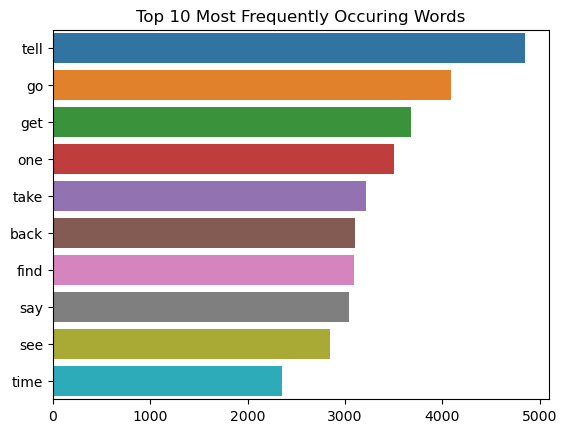

In [144]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

# ngramns

In [145]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['processed_plot'])


In [146]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

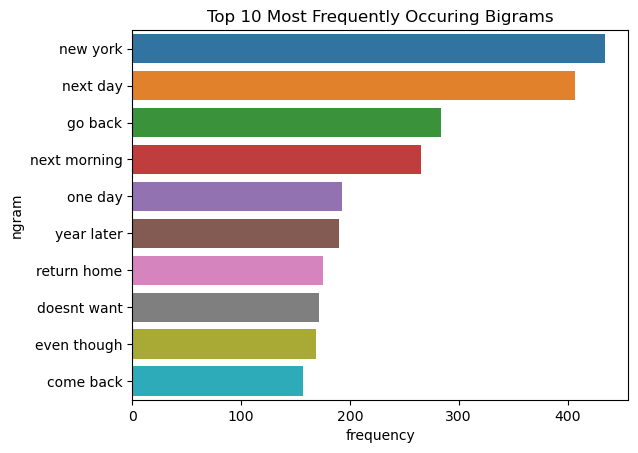

In [147]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [149]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['processed_plot'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

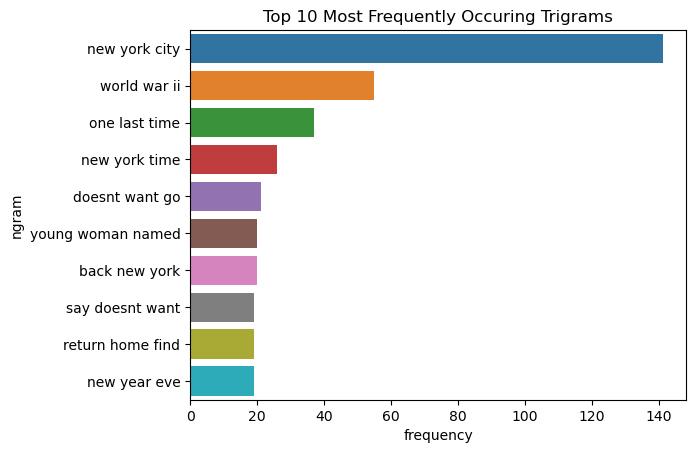

In [150]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()